# Advanced image processes Ⅱ

&copy; 李浩东 haodongli@zju.edu.cn
&copy; 孙正男 3190104890@zju.edu.cn

- Image Gradient
- Edge detection
- Blob detection algorithm

# 1 Image gradient

![image_gradient](./images/image_gradient.png)


## 1.1 图像梯度
* 对于图像函数$f(x,y)$，它在点$(x,y)$处的梯度是一个矢量，定义为:
    $$
        G(f(x, y))=\left[\begin{array}{l}
        \displaystyle\frac{\partial f}{\partial x} \\
        \displaystyle\frac{\partial f}{\partial y}
        \end{array}\right]
    $$
* 图像一阶与二阶微分分别表示为：
    $$
        \begin{aligned}
        &\frac{\partial f}{\partial x}=f(x+1, x)-f(x, y) \\ &\frac{\partial f}{\partial y}=f(x, y+1)-f(x, y) \\
        &\frac{\partial^{2} f}{\partial x^{2}}=f(x+1, y)+f(x-1, y)-2 f(x, y) \\&\frac{\partial^{2} f}{\partial y^{2}}=f(x, y+1)+f(x, y-1)-2 f(x, y)
        \end{aligned}
    $$

* 图像梯度两个性质:
    * 梯度的方向在函数$f(x,y)$最大变化率的方向上
    * 梯度的幅度：
        $$G(f(x, y)) =  \displaystyle\left[\left(\frac{\partial f}{\partial x}\right)^{2}+\left(\frac{\partial f}{\partial y}\right)^{2}\right]^{1 / 2}$$
* 水平垂直差分法：
    $$
        \begin{gathered}
        G[f(x, y)]=\left\{[ f(i, j)-\left.f(i+1, j)\right|^{2}+[f(i, j)-f(i, j+1)]^{2}\right\}^{1 / 2} \\
        G[f(x, y)]=|f(i, j)-f(i+1, j)|+|f(i, j)-f(i, j+1)| \quad  \text {(approx) }
        \end{gathered}
    $$
* 罗伯特梯度法：
    $$
        \begin{aligned}
&\left.G[f(x, y)]=\{[ f(i, j)-f(i+1, j+1)]^{2}+[f(i+1, j)-f(i, j+1)]^{2}\right\}^{1 / 2} \\
&G[f(x, y)]=|f(i, j)-f(i+1, j+1)|+|f(i+1, j)-f(i, j+1)|\quad (\text { approx })
\end{aligned}
    $$

## 1.2 常用梯度算子
$\left(G=\left(g_{1}^{2}+g_{2}^{2}\right)^{1 / 2}\right)$

- Roberts
- Prewitt
- Sobel
- Krish
- Isotropic Sobel
- Laplacian
- Canny

##### a. Roberts

- 边缘定位准，但对噪声敏感

    $$
    g_{1}=\left[\begin{array}{cc}
    0 * & 1 \\
    -1 & 0
    \end{array}\right] \quad g_{2}=\left[\begin{array}{cc}
    1 * & 0 \\
    0 & -1
    \end{array}\right]
    $$


##### b. Prewitt

- 平均、微分对噪声有抑制作用

$$
g_{1}=\left[\begin{array}{ccc}
-1 & 0 & 1 \\
-1 & 0^{*} & 1 \\
-1 & 0 & 1
\end{array}\right] \quad g_{2}=\left[\begin{array}{ccc}
-1 & -1 & 1 \\
0 & 0 * & 0 \\
1 & 1 & 1
\end{array}\right]
$$


##### c. Sobel

- 加权平均边宽大于等于2像素

$$
g_{1}=\left[\begin{array}{ccc}
-1 & 0 & 1 \\
-2 & 0 * & 2 \\
-1 & 0 & 1
\end{array}\right] \quad g_{2}=\left[\begin{array}{ccc}
-1 & -2 & 1 \\
0 & 0 * & 0 \\
1 & 2 & 1
\end{array}\right]
$$


##### d. Krish

- 对噪声有较好地抑制作用

$$
g_{1}=\left[\begin{array}{ccc}
5 & 5 & 5 \\
-3 & 0 * & -3 \\
-3 & -3 & -3
\end{array}\right] \quad g_{2}=\left[\begin{array}{ccc}
-3 & -3 & 5 \\
-3 & 0 * & 5 \\
-3 & -3 & 5
\end{array}\right]
$$


##### e. Isotropic Sobel

- 权值反比与领点与中心点的距离，检测沿不同方向边缘时梯度幅度一致

$$
g_{1}=\left[\begin{array}{ccc}
-1 & 0 & 1 \\
-\sqrt{2} & 0 * & \sqrt{2} \\
-1 & 0 & 1
\end{array}\right] \quad g_{2}=\left[\begin{array}{ccc}
-1 & -\sqrt{2} & 1 \\
0 & 0 * & 0 \\
1 & \sqrt{2} & 1
\end{array}\right]
$$



##### f.  Laplacian

- 二阶微分算子，具有各向同性；对噪声比较敏感

$$
g_1=\left[\begin{array}{ccc}
0 & -1 & 0 \\
-1 & 4^{*} & -1 \\
0 & -1 & 0
\end{array}\right] \quad g_2=\left[\begin{array}{ccc}
-1 & -1 & -1 \\
-1 & 8^{*} & -1 \\
-1 & -1 & -1
\end{array}\right] \\\\ \\\\ g_3=\left[\begin{array}{ccc}
1 & -2 & 1 \\
-2 & 4^{*} & -2 \\
1 & -2 & 1
\end{array}\right] \quad g_4=\left[\begin{array}{ccc}
0 & -1 & 0 \\
-1 & 5 * & -1 \\
0 & -1 & 0
\end{array}\right]
$$

##### g. **Canny**

- Gaussian filter for image
- $5\times 5$ Gaussian filter with ${\displaystyle \sigma }  = 1$

$$
\mathbf{B}=\frac{1}{159}\left[\begin{array}{ccccc}
2 & 4 & 5 & 4 & 2 \\
4 & 9 & 12 & 9 & 4 \\
5 & 12 & 15 & 12 & 5 \\
4 & 9 & 12 & 9 & 4 \\
2 & 4 & 5 & 4 & 2
\end{array}\right] * \mathbf{A}
$$


## 1.3 Example：3x3 Sobel算子计算过程
### 1.3.1 计算水平方向偏导数近似值
* 水平方向偏导数Gx计算公式：
    $$
        G_x = \begin{bmatrix}-1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1    \end{bmatrix} \cdot src
    $$
* src是原始图像，假设有9个像素点，计算P5像素点的Gx：
    $$
        G_x = \begin{bmatrix}-1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1    \end{bmatrix} \times \begin{bmatrix}P_1 & P_2 & P_3 \\ P_4 & P_5 & P_6 \\ P_7 & P_8 & P_9    \end{bmatrix}
    $$
    即$P_{5x} = (P_3-P_1) + 2 · (P_6-P_4) + (P_9-P_7)$
 

### 1.3.2 计算垂直方向偏导数近似值
* 垂直方向偏导数Gy计算公式：
    $$
        G_y = \begin{bmatrix}-1 & -2 & 1 \\ 0 & 0 & 0 \\ -1 & 2 & 1    \end{bmatrix} \cdot src
    $$
* src是原始图像，假设有9个像素点，计算P5像素点的Gy：
    $$
        G_y = \begin{bmatrix}-1 & -2 & 1 \\ 0 & 0 & 0 \\ -1 & 2 & 1     \end{bmatrix} \times \begin{bmatrix}P_1 & P_2 & P_3 \\ P_4 & P_5 & P_6 \\ P_7 & P_8 & P_9    \end{bmatrix}
    $$
    即$P_{5x} = (P_7-P_1) + 2 · (P_8-P_2) + (P_9-P_3)$

### 1.3.3 计算梯度
* 计算最终梯度：
    $$
        G=\left(G_{x}^{2}+G_{y}^{2}\right)^{1 / 2}
    $$

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

(399, 599, 3)


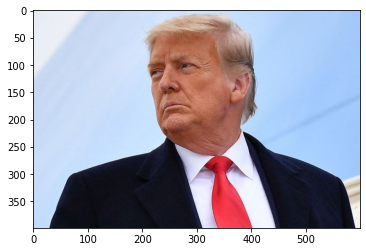

In [2]:
# Imread
img_bgr = cv2.imread(r".\images\trump.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)
plt.imshow(img_rgb)
img_gray = cv2.imread(r".\images\trump.jpg", flags=0)
titles = ["Original"]
images = [img_rgb]

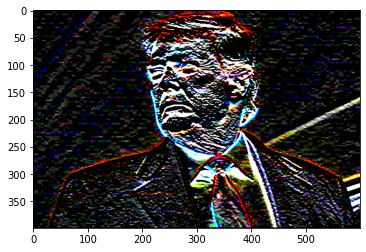

In [3]:
img_edge = cv2.Sobel(img_rgb, cv2.CV_16S, 0, 1, ksize=5, scale=1, delta=0)
plt.imshow(np.clip(img_edge, 0, 255, dtype=np.int32), "gray")
titles.append("Sobel X")
images.append(np.clip(img_edge, 0, 255, dtype=np.int32))

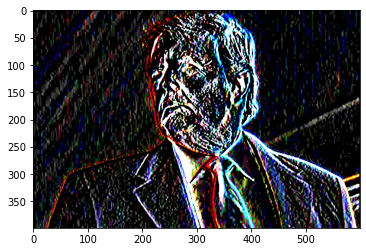

In [4]:
img_edge = cv2.Sobel(img_rgb, cv2.CV_16S, 1, 0, ksize=5, scale=1, delta=0)
plt.imshow(np.clip(img_edge, 0, 255, dtype=np.int32), "gray")
titles.append("Sobel Y")
images.append(np.clip(img_edge, 0, 255, dtype=np.int32))

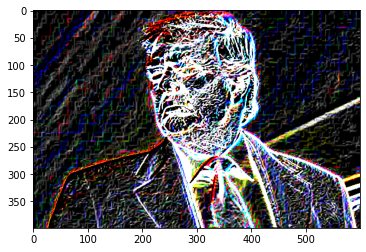

In [5]:
img_edge = cv2.bitwise_or(images[-1], images[-2])
plt.imshow(np.clip(img_edge, 0, 255, dtype=np.int32), "gray")
titles.append("Sobel OR")
images.append(np.clip(img_edge, 0, 255, dtype=np.int32))

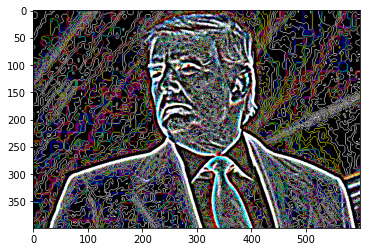

In [6]:
blur = cv2.GaussianBlur(img_rgb, (11, 11), 0)
img_edge = cv2.Laplacian(blur, cv2.CV_64F)
plt.imshow(np.clip(img_edge, 0, 1), "gray")
titles.append("Laplacian")
images.append(np.clip(img_edge, 0, 1))

In [7]:
def show_edges(images, titles):
    plt.figure(figsize=(20, 9))
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i], "gray")
        plt.title(titles[i])

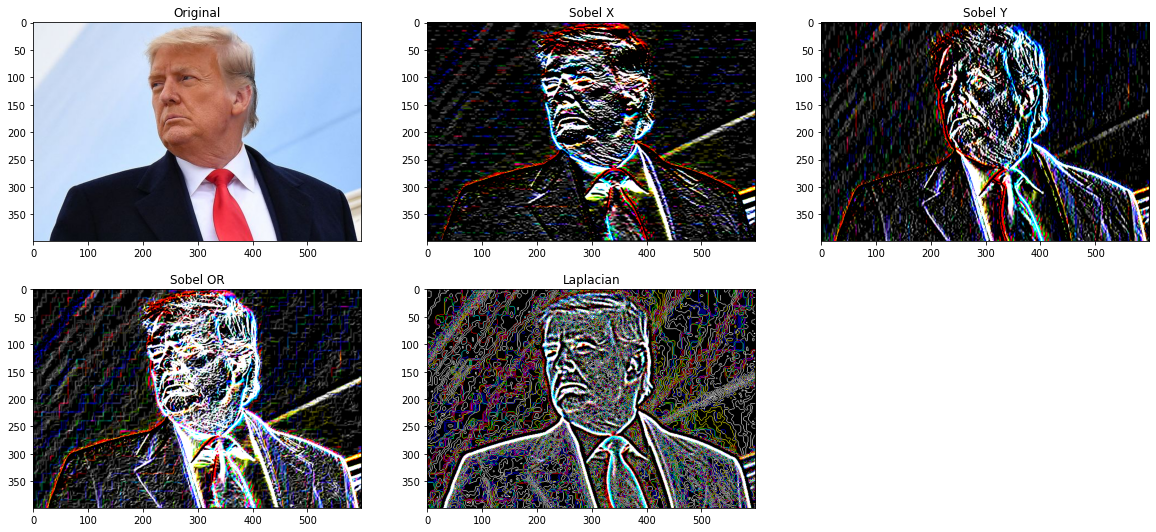

In [8]:
show_edges(images, titles)

# 2 Edge detection

![edge_detection](./images/edge_detection.png)


## 2.1 一般步骤
* **滤波**：边缘检测算法主要是基于图像强度的一阶和二阶导数，但是导数对于噪声很敏感，因此需要采用滤波器来改善与噪声有关的边缘检测器的性能
* **增强**：增强边缘的基础是确定图像各点邻域强度的变化值。增强算法可以将灰度点邻域强度值有显著变化的点凸显出来
* **检测**：邻域中有很多的点的梯度值较大，但是在特定的应用中，这些点并不是要找的边缘点，需要取舍

## 2.2 Canny 边缘检测
Canny边缘检是在在1986年提出来的，到今天已经30多年过去了，但Canny算法仍然是图像边缘检测
算法中最经典、先进的算法之一。相比Sobel、Prewitt等算子，Canny算法更为优异。
* Sobel、Prewitt等算子有如下缺点：
   * 没有充分利用边缘的梯度方向。
   * 最后得到的二值图，只是简单地利用单阈值进行处理。
* 而Canny算法基于这两点做了改进，提出了：
    * 基于边缘梯度方向的非极大值抑制。（不是最大信号就舍弃）
    * 双阈值的滞后阈值处理。（将小于低阈值的点抛弃，赋0；将大于高阈值的点立即标记确定边缘点，赋1或255；）
* 步骤了解：
    * 应用**高斯滤波平滑图像**，目的是平滑一些纹理较弱的非边缘区域，减少误检测。
    * 计算**图像梯度**，得到可能边缘;
    * 应用**非最大抑制技术**来消除边误检；
        * 逐一遍历像素点，判断当前像素点是否是周围像素点中具有相同梯度方向的最大值，并根据判断结果决定是否抑制该点
    * 应用**双阈值**的方法筛选边缘信息;
        * 高低两个阈值，大于高阈值为强边缘，俩阈值间为虚边缘，小于低阈值不是边缘
        * 弱边缘如果与强边缘相连，则保留，否则丢弃
    * 利用**滞后技术**来跟踪边界。

##### Opencv Canny funciton
* edges = cv.Canny( image, threshold1, threshold2[, apertureSize[, L2gradient]])
    * edges:计算得到的边缘图像。
    * image: 8位输入图像。
    * threshold1: 处理过程中的第一个阈值。
    * threshold2:处理过程中的第二个阈值。
    * apertureSize: 表示 Sobel 算子的孔径大小。
    * L2gradient:为计算图像梯度幅度（gradient magnitude）的标识。默认值为 False。如果为 True，则使用更精确的L2范数进行计算（即两个方向的导数的平方和再开方），否则使用 L1 范数（直接将两个方向导数的绝对值相加）。


In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

(399, 599, 3)


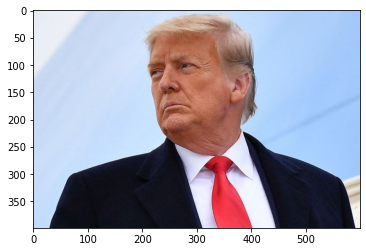

In [2]:
# Imread
img_bgr = cv2.imread(r".\images\trump.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)
plt.imshow(img_rgb)
img_gray = cv2.imread(r".\images\trump.jpg", flags=0)
titles = ["Original"]
images = [img_rgb]

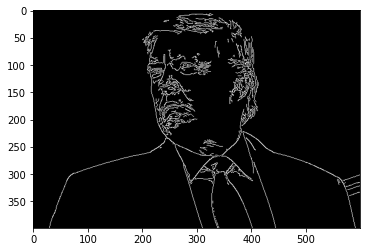

In [3]:
# Threshold 70, 140
img_edge = cv2.Canny(img_gray, threshold1=70, threshold2=140,
                     apertureSize=3, L2gradient=False)
plt.imshow(img_edge, "gray")
titles.append("Canny, 70, 140")
images.append(img_edge)

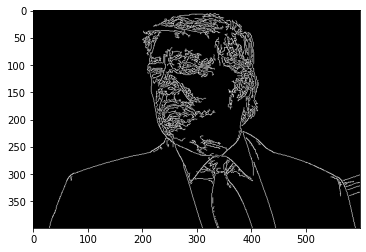

In [4]:
# Threshold 30, 140
img_edge = cv2.Canny(img_gray, threshold1=30, threshold2=140,
                     apertureSize=3, L2gradient=False)
plt.imshow(img_edge, "gray")
titles.append("Canny, 30, 140")
images.append(img_edge)

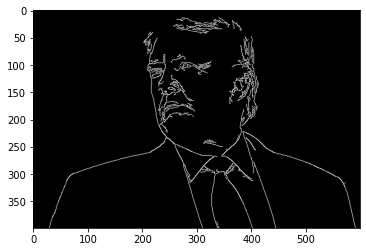

In [5]:
# Threshold 70, 240
img_edge = cv2.Canny(img_gray, threshold1=70, threshold2=240,
                     apertureSize=3, L2gradient=False)
plt.imshow(img_edge, "gray")
titles.append("Canny, 70, 240")
images.append(img_edge)

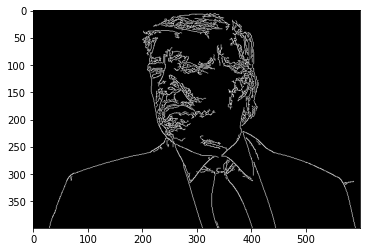

In [6]:
# Threshold 30, 240
img_edge = cv2.Canny(img_gray, threshold1=30, threshold2=240,
                     apertureSize=3, L2gradient=False)
plt.imshow(img_edge, "gray")
titles.append("Canny, 30, 240")
images.append(img_edge)

In [7]:
def show_edges(images, titles):
    plt.figure(figsize=(20, 9))
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i], "gray")
        plt.title(titles[i])

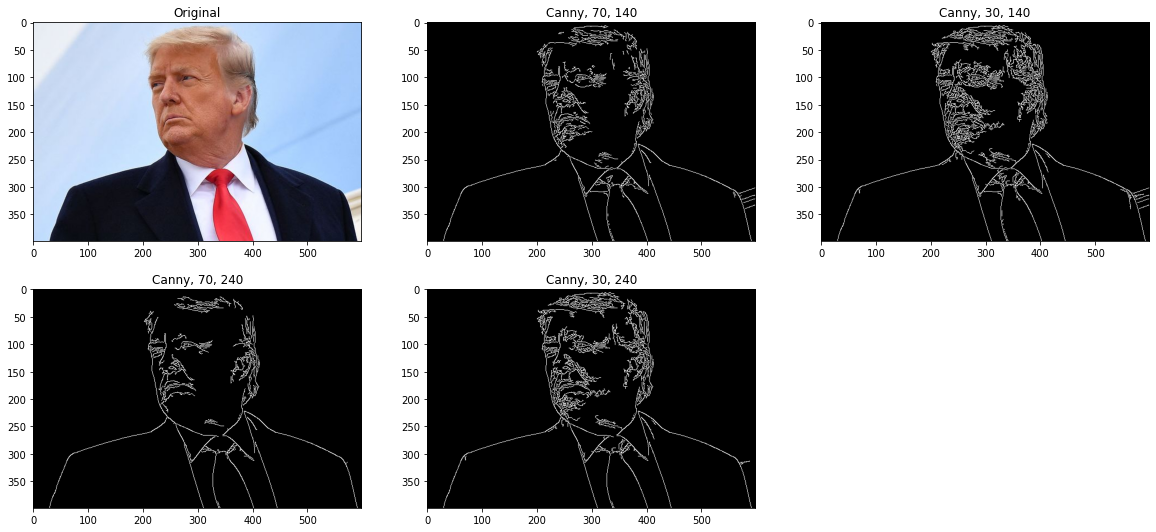

In [8]:
show_edges(images, titles)

# 3 Blob detection 斑点检测

![blob_detection](./images/blob_detection.png)


* `Blob`是指图像中的具有相似颜色、纹理等特征所组成的一块连通区域。
* Blob检测过程其实就是将图像进行二值化，分割得到前景和背景，然后进行连通区域检测，从而得到Blob块的过程。
* 简单来说，Blob检测就是**在一块“光滑”区域内，将出现“灰度突变”的小区域寻找出来**。
* 纺织品的瑕疵检测，玻璃的瑕疵检测，机械零件表面缺陷检测，可乐瓶缺陷检测，药品胶囊缺陷检测等很多场合都会用到Blob检测

## Blob Detection in Opencv

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(694, 1024, 3)


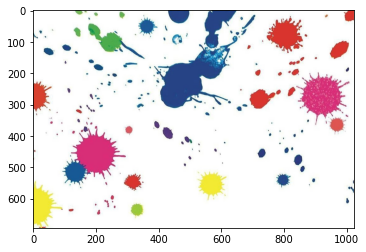

In [2]:
img_paint = cv2.imread("./images/paint.jpg")
img_paint_rgb = cv2.cvtColor(img_paint, cv2.COLOR_BGR2RGB)
print(img_paint_rgb.shape)
plt.imshow(img_paint_rgb)
img_paint_gray = cv2.imread("./images/paint.jpg", flags=0)

In [4]:
# Blob Detector
# Set Parameters
params = cv2.SimpleBlobDetector_Params()
# change thresholds
params.minThreshold = 10
params.maxThreshold = 200
# filter by area
params.filterByArea = True
params.minArea = 1
# filter by circularity
params.filterByCircularity = True
params.minCircularity = 0.5
# filter by convexity
params.filterByConvexity = True
params.minConvexity = 0.5
# filter by inertia
params.filterByInertia = True
params.minInertiaRatio = 0.5
# Create Detector
detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(img_paint_gray)
print("numbber of Bolds ->", len(keypoints))

numbber of Bolds -> 829


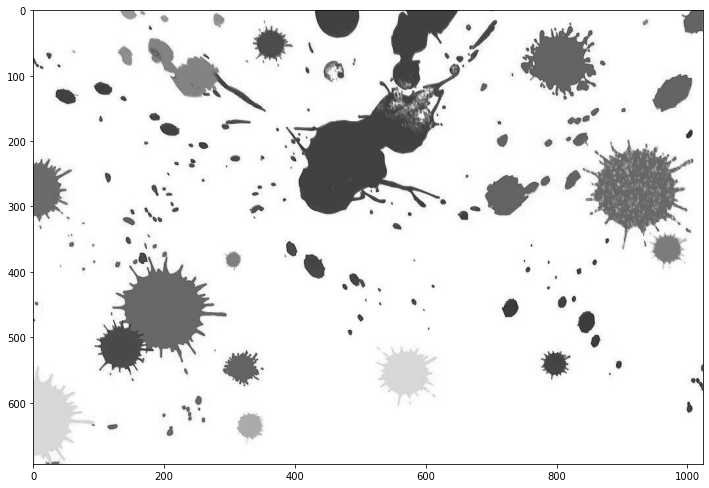

In [5]:
plt.figure(figsize=(12, 12))
plt.imshow(img_paint_gray, "gray")

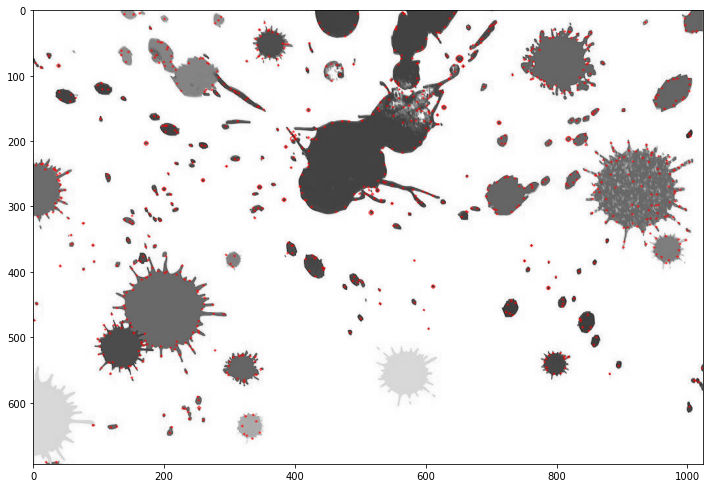

In [7]:
img_pts = cv2.drawKeypoints(img_paint_gray, keypoints, np.array([]), (255, 0, 0), 
                            cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(12, 12))
plt.imshow(img_pts)

# The End

2023.4